# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The dataset is located [here](https://drive.google.com/file/d/1z1gYSD32ktbHuKSzB5JVS_u4YsLibh5F/view?usp=sharing), please download it and place it in the data folder.

In [4]:
# loading the data:
customer = pd.read_csv('../data/Wholesale_customer_data.csv')
 
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [5]:
# Your code here:
customer.dtypes
# data type is correct

#columns channel and region seem categorical (option o 1,2 or 3)
# while the rest of the columns are the amount spent

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [6]:
# checking for missing data
null_cols = customer.isna().sum()
null_cols[null_cols > 0]

# no missing data found

Series([], dtype: int64)

In [7]:
# checking for Column collinearity
customer.corr()

#no, only one very high correlation of 0.92, but as they are quite different categories, I don't think
#it should be removed (if we want to observe total $ spent)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


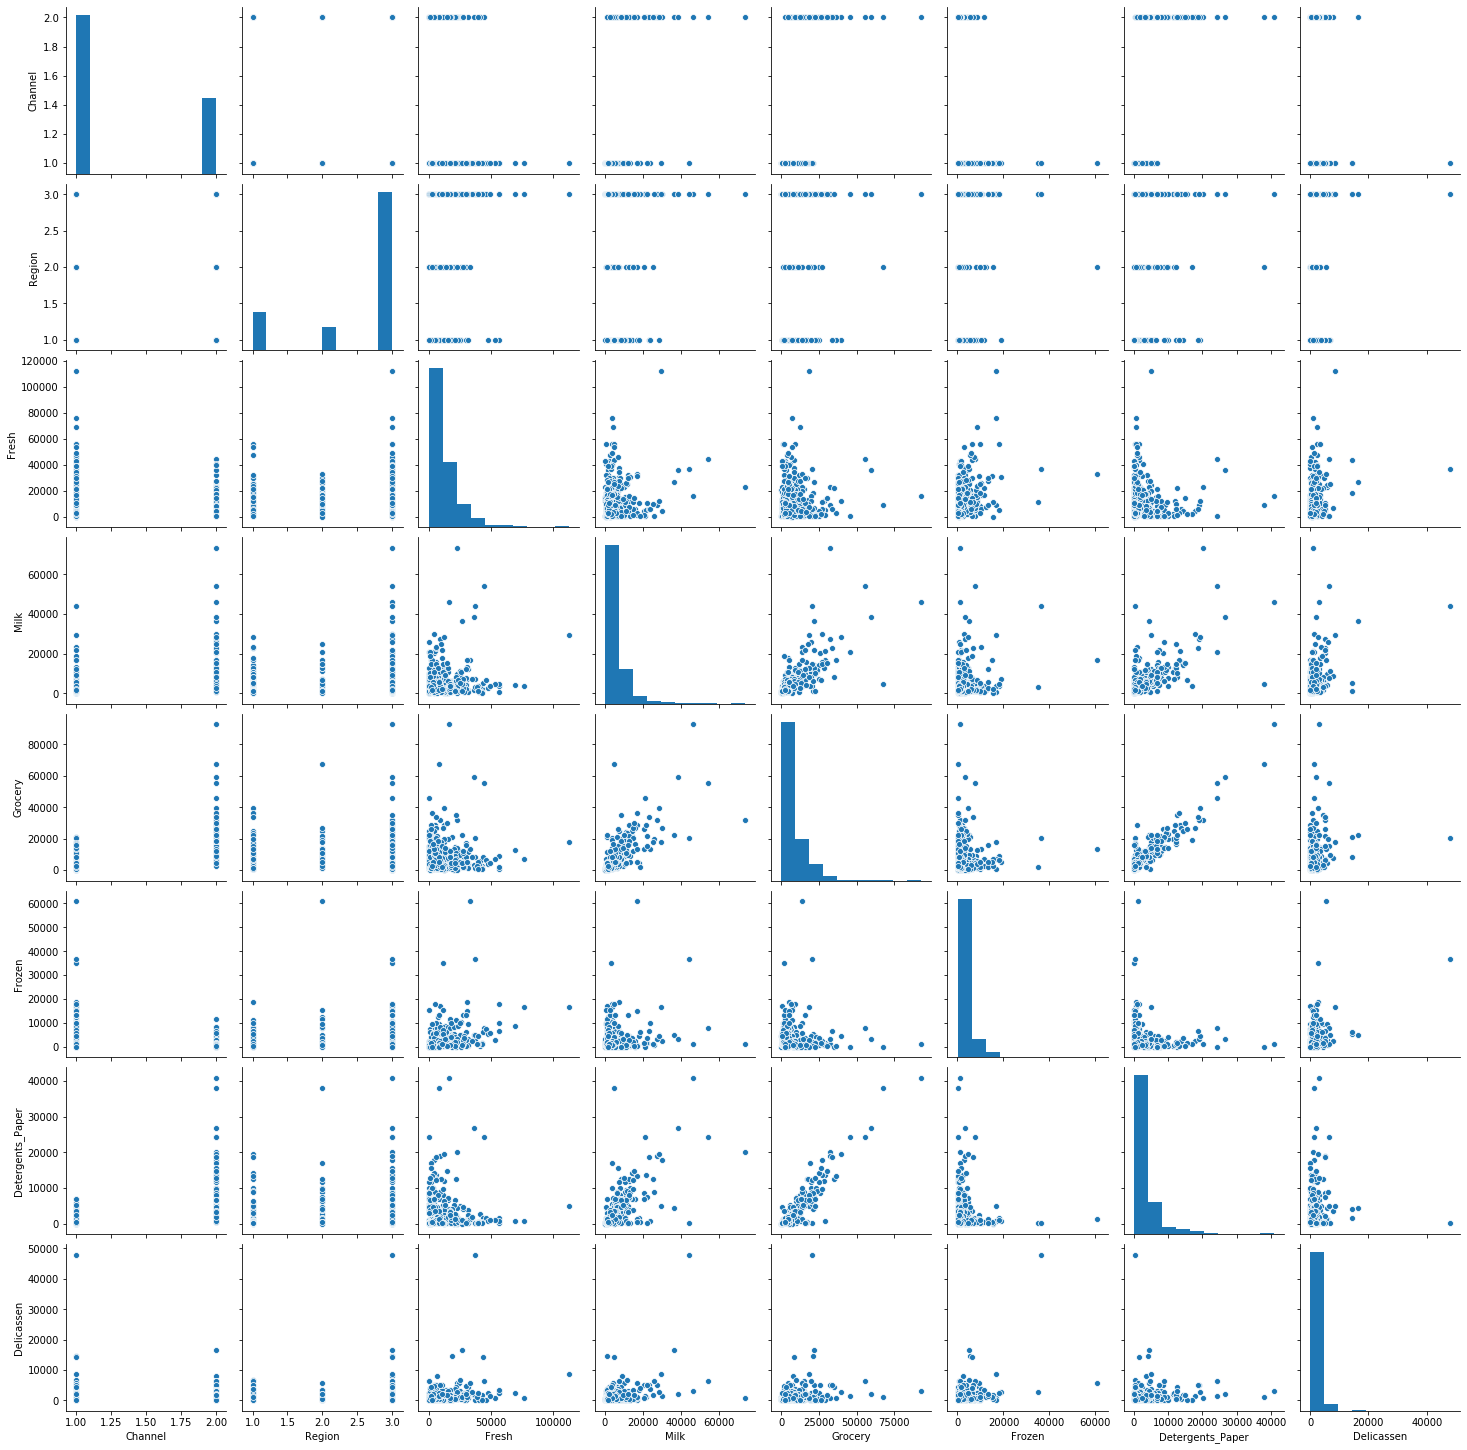

In [8]:
# checking
customer.describe().transpose()

sns.pairplot(customer)

# If we focus on the middle line, we can observe how the data is distributed
# for all atributed, except region (which is categorical anyway) the data is skwed to the left
# there seem to be quite some outliers, but if could be due to specific shopping patterns,
# I dont feel familiar enough with the data to decide to remove them yet

In [9]:
# checking for PARETO principle
customer.loc[:,'Total'] = customer[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']].sum(axis=1)
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,1,3,13265,1196,4221,6404,507,1788,27381
4,2,3,22615,5410,7198,3915,1777,5185,46100


In [10]:
customer.shape #440 rows

# twenty % of the customers is 88
cust_20 = 440*.2

# so we will select the highest 88 totals
customer['Total'].nlargest(int(cust_20)).sum() / customer['Total'].sum()

# it seems here that the top 20% of the customers only have 42% of the total, 
# so the pareto principle does not apply
#Paolo: very good analysis

0.42904839426792984

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [11]:
# Your comment here
# data types are OK, there is no missing data, and I'm choosing to keep the outliers

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [12]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

model = StandardScaler()
customers_scale = model.fit_transform(customer)
customers_scale = pd.DataFrame(customers_scale)
customers_scale

,0,1,2,3,4,5,6,7,8
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0.033649
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,0.001514
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,0.128535
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.222026
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,0.489011
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,1.522273
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,0.575312
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,1.678200
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,-0.584667


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [14]:
# Your code here:
from sklearn.cluster import KMeans

customer_kmeans = KMeans().fit(customers_scale)
customer_kmeans

customer['labels'] = customer_kmeans.labels_

Count the values in `labels`.

In [15]:
# Your code here:
customer['labels'].value_counts()

# there are 8 different clusters, because default is n = 8

1    143
0     95
3     79
7     70
6     35
2     12
4      5
5      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [16]:
# Your code here
from sklearn.cluster import DBSCAN

customer_model = DBSCAN(eps=0.5).fit(customers_scale)
customer['labels_DBSCAN'] = customer_model.labels_

Count the values in `labels_DBSCAN`.

In [18]:
# Your code here
customer['labels_DBSCAN'].value_counts()
# the largest group is -1, which is noise... ?
#Paolo: yes, exactly is not able to properly cluster those elements

-1    286
 1    120
 3     16
 2      7
 4      6
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

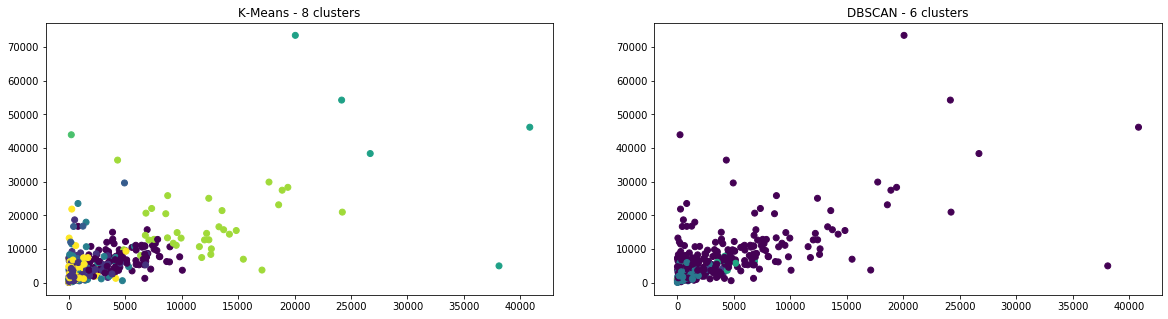

In [19]:
# Your code here:

fig, [ax1, ax2] = plt.subplots(1,2, figsize = (20,5))

ax1.scatter(x=customer['Detergents_Paper'], y=customer['Milk'], c=customer['labels'])
ax1.set_title('K-Means - 8 clusters')


ax2.scatter(x=customer['Detergents_Paper'], y=customer['Milk'], c=customer['labels_DBSCAN'])
ax2.set_title('DBSCAN - 6 clusters')


plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

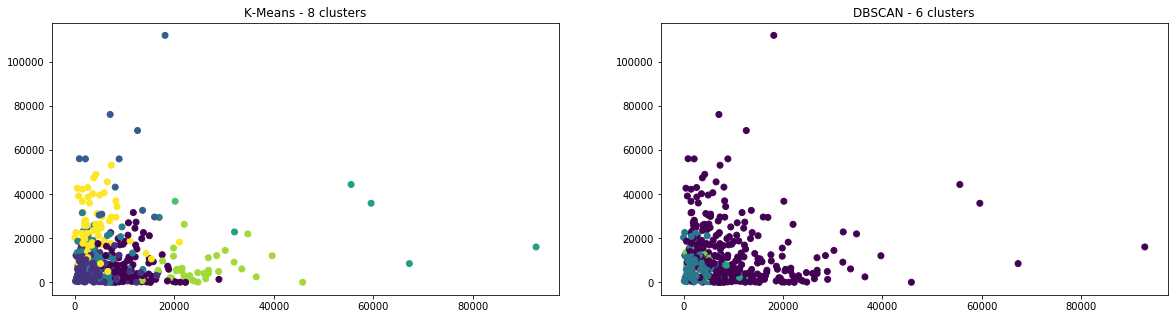

In [20]:
# Your code here:
fig, [ax1, ax2] = plt.subplots(1,2, figsize = (20,5))

ax1.scatter(x=customer['Grocery'], y=customer['Fresh'], c=customer['labels'])
ax1.set_title('K-Means - 8 clusters')


ax2.scatter(x=customer['Grocery'], y=customer['Fresh'], c=customer['labels_DBSCAN'])
ax2.set_title('DBSCAN - 6 clusters')


plt.show()

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

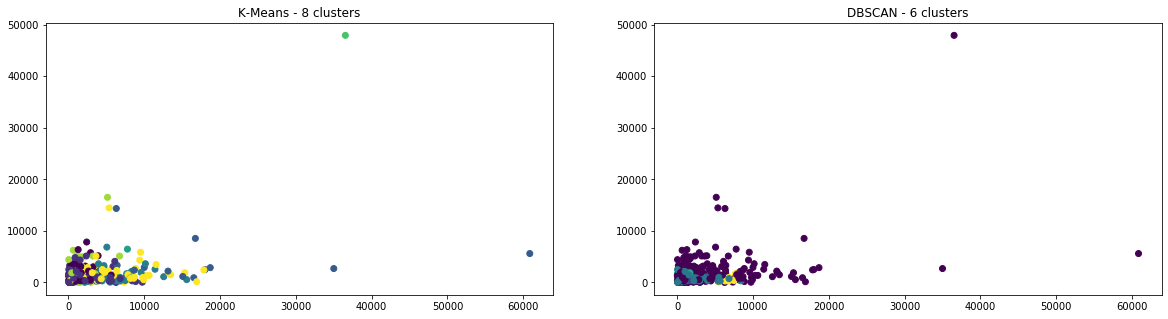

In [21]:
# Your code here:
fig, [ax1, ax2] = plt.subplots(1,2, figsize = (20,5))

ax1.scatter(x=customer['Frozen'], y=customer['Delicassen'], c=customer['labels'])
ax1.set_title('K-Means - 8 clusters')


ax2.scatter(x=customer['Frozen'], y=customer['Delicassen'], c=customer['labels_DBSCAN'])
ax2.set_title('DBSCAN - 6 clusters')


plt.show()
#Paolo: nice visualizations, could add labels on axes

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [22]:
# Your code here:
customer.groupby('labels').mean()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,labels_DBSCAN
labels,,,,,,,,,,
0,2.000000,2.789474,8208.747368,7405.673684,11462.652632,1298.484211,4786.947368,1475.610526,34638.115789,-0.726316
1,1.000000,2.979021,6416.902098,2731.482517,3258.713287,1890.405594,767.916084,925.489510,15990.909091,0.538462
2,1.000000,2.583333,50358.166667,8914.916667,8329.083333,18795.416667,1100.416667,4125.833333,91623.833333,-1.000000
3,1.050633,1.253165,10213.734177,3280.151899,4220.898734,3203.670886,925.468354,1075.063291,22918.987342,0.189873
4,2.000000,2.800000,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000,165854.800000,-1.000000
5,1.000000,3.000000,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,185683.000000,-1.000000
6,2.000000,2.285714,6347.428571,16369.685714,25193.628571,1886.914286,11844.857143,2374.057143,64016.571429,-1.000000
7,1.042857,2.871429,25492.542857,3655.900000,4298.657143,5193.928571,746.971429,1705.657143,41093.657143,-0.714286


In [23]:
customer.groupby('labels_DBSCAN').mean()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total,labels
labels_DBSCAN,,,,,,,,,,
-1,1.454545,2.451049,14180.041958,7773.297203,10675.541958,3688.674825,4023.667832,1947.555944,42288.779720,3.087413
0,2.000000,3.000000,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,26205.600000,0.000000
1,1.000000,3.000000,8118.158333,1854.283333,2404.358333,1874.941667,493.258333,718.933333,15463.933333,1.500000
2,2.000000,3.000000,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,27015.000000,0.000000
3,1.000000,1.000000,8190.000000,2041.875000,2279.250000,1278.437500,315.250000,619.500000,14724.312500,3.000000
4,1.000000,1.000000,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,18919.166667,3.000000


Which algorithm appears to perform better?

In [ ]:
# Your observations here
# its really hard to tell from the averages, but from the graphs I would say that K-means
# does a better job, especially at identifying all the outliers and classifying them
# then again, I'm only judging this from intuition, I'm not really sure how to measure it
#Paolo: yes, I agree plus dbscan has many instances of noise. You could play with the parameters of dbscan
# and Kmeans to see what changes. In Kmeans with current parameters (n=8) you have a cluster with only one
# element

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here